In [571]:
import time
inicio = time.time()

In [572]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm


from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model,datasets, svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import catboost
from catboost import CatBoostClassifier, Pool, cv

from sklearn.model_selection import GridSearchCV


In [573]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [574]:
train.info()            #891 linhas e 12 colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [575]:
test.info()                  #418 linha e 11 colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [576]:
train["Sex"].unique()

array(['male', 'female'], dtype=object)

In [577]:
train['Sex'] = train['Sex'].replace({'male':0,'female':1})

In [578]:
test['Sex'] = test['Sex'].replace({'male':0,'female':1})

In [579]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Sex,891.0,0.352413,0.477990,0.00,0.0000,0.0000,1.0,1.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [580]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Sex,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [581]:
train.isnull().sum()                                                                             #valores nulos em Age, Cabin, Embarked.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [582]:
test.isnull().sum()                                                                                   #valores nulos em Age, Fare, Cabin.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [583]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


##### titulo no nome

In [584]:
titulo = []
for i in train.index:
    a = train['Name'][i].split(',')[1].split('.')[0].strip()
    titulo.append(a)
train['titulo'] = titulo

In [585]:
titulo = []
for i in test.index:
    a = test['Name'][i].split(',')[1].split('.')[0].strip()
    titulo.append(a)
test['titulo'] = titulo

In [586]:
train['titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [587]:
test['titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [588]:
train['titulo'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: titulo, dtype: int64

In [589]:
test['titulo'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: titulo, dtype: int64

### correlação para notar como preencher os capos faltantes que são: Age, Fare, Cabin e Embarked.

<AxesSubplot:>

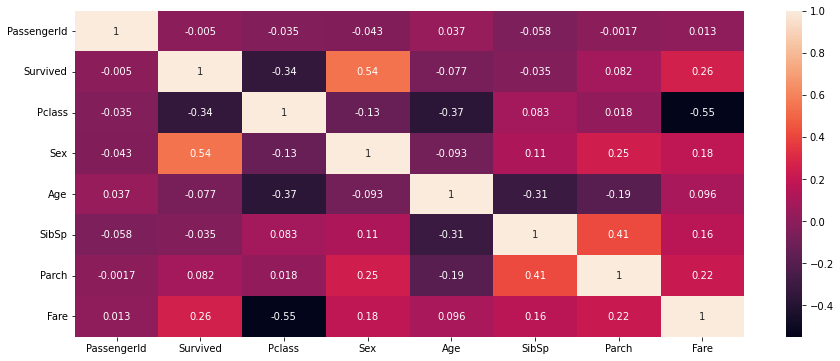

In [590]:
plt.figure(figsize=(15,6))
sns.heatmap(data=train.corr(method='pearson'),annot=True )

<AxesSubplot:>

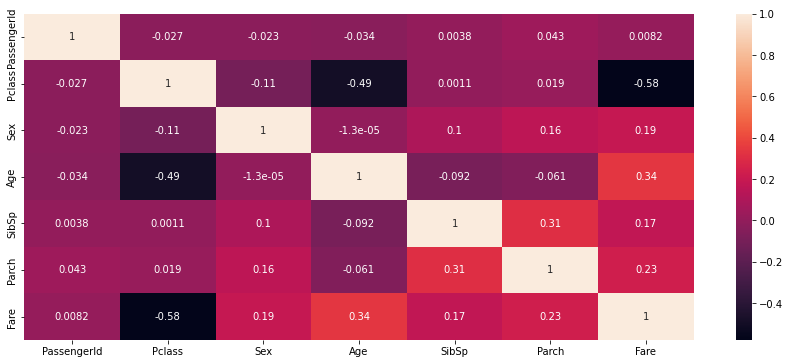

In [591]:
plt.figure(figsize=(15,6))
sns.heatmap(data=test.corr(method='pearson'),annot=True )

<AxesSubplot:xlabel='titulo', ylabel='Age'>

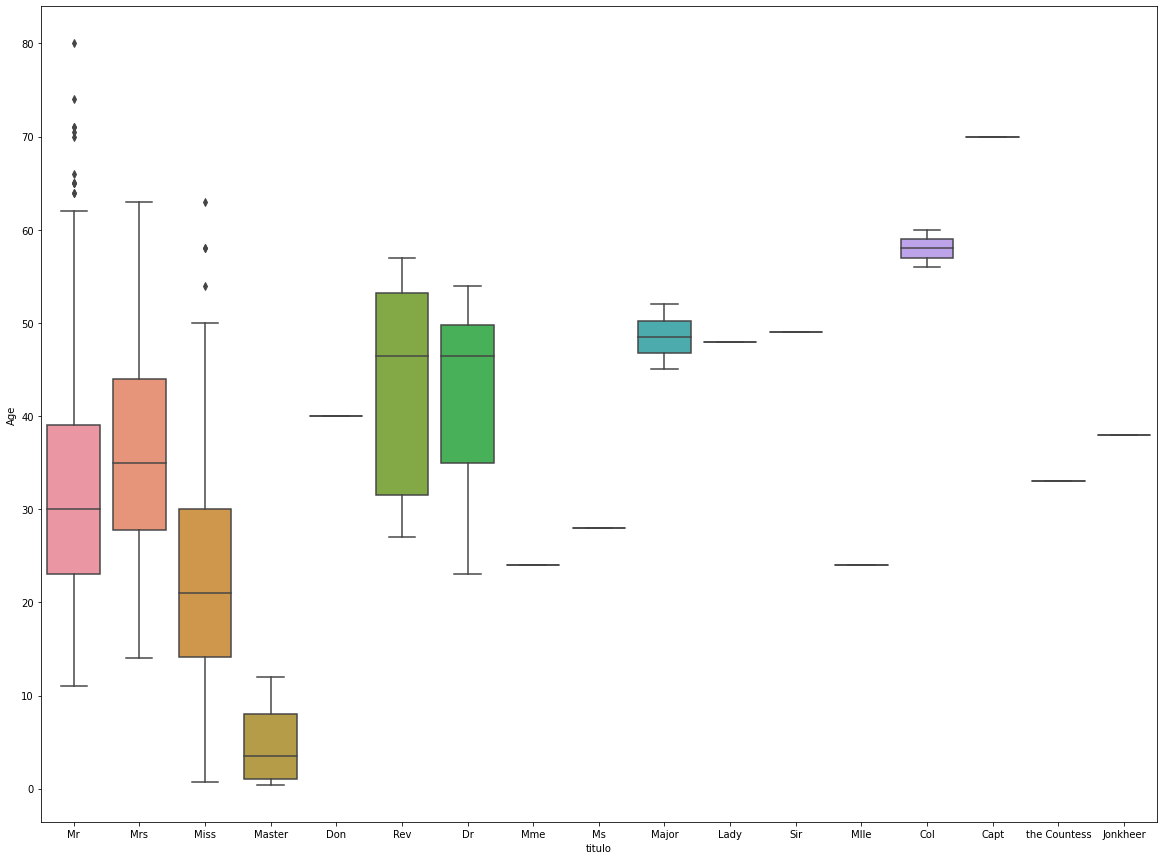

In [592]:
plt.figure(figsize=(20,15))
sns.boxplot(data=train, x='titulo',y='Age')

<AxesSubplot:xlabel='titulo', ylabel='Age'>

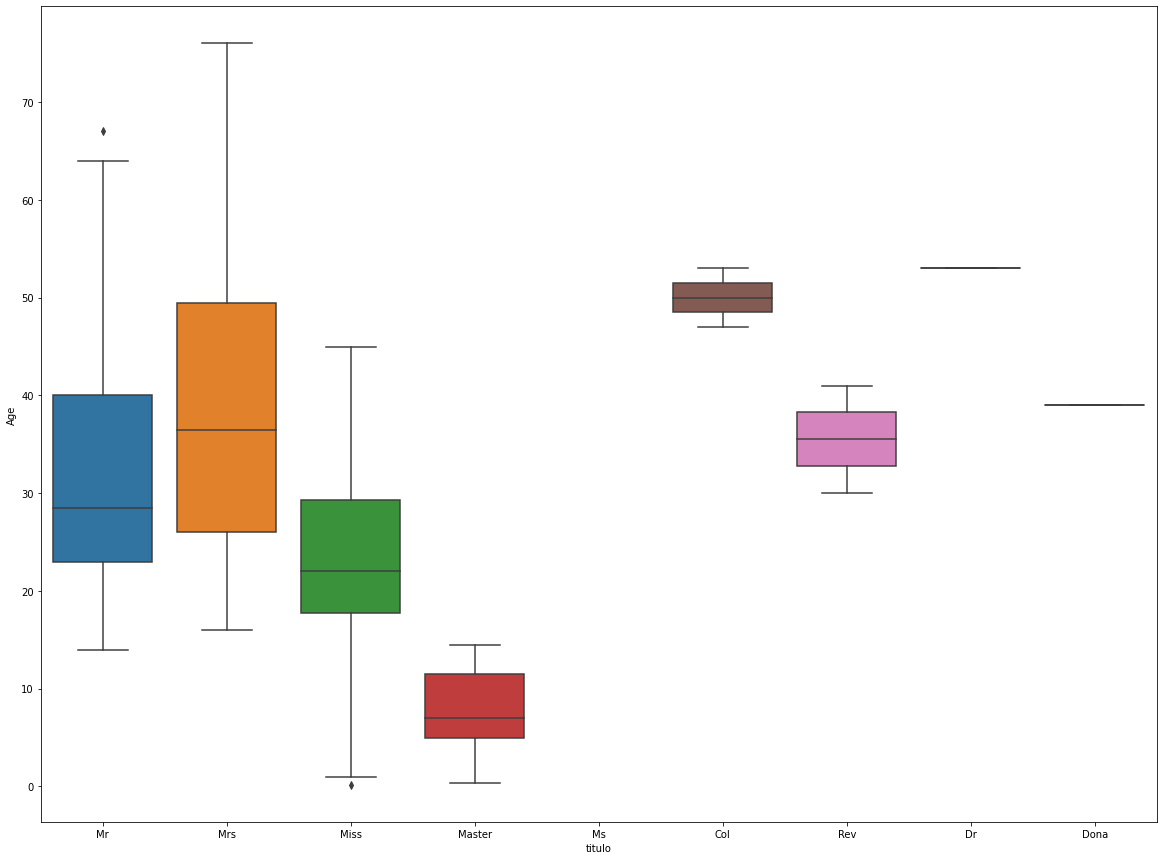

In [593]:
plt.figure(figsize=(20,15))
sns.boxplot(data=test, x='titulo',y='Age')

###### Comparando do DataFrames parece ser justo completar a idade pelo titulo carregado no nome. as medias de idades por titulos aparentam graficamente serem parecidadas.

In [594]:
train.groupby(by='titulo').mean()['Age']

titulo
Capt            70.000000
Col             58.000000
Don             40.000000
Dr              42.000000
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           4.574167
Miss            21.773973
Mlle            24.000000
Mme             24.000000
Mr              32.368090
Mrs             35.898148
Ms              28.000000
Rev             43.166667
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [595]:
test.groupby(by='titulo').mean()['Age']                                             #Ms teve NaN em Age. será usado entao e media de sua pclass


titulo
Col       50.000000
Dona      39.000000
Dr        53.000000
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Ms              NaN
Rev       35.500000
Name: Age, dtype: float64

In [596]:
test.loc[test.titulo=="Ms"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titulo
88,980,3,"O'Donoghue, Ms. Bridget",1,NaN,0,0,364856,7.75,NaN,Q,Ms


In [597]:
test.groupby(by='Pclass').mean()['Age']

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [598]:
test['Age'][test.loc[test.titulo=="Ms"].index] = test.groupby(by='Pclass').mean()['Age'][3].round()

C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\1071427772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test.loc[test.titulo=="Ms"].index] = test.groupby(by='Pclass').mean()['Age'][3].round()


In [599]:
test.loc[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titulo
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,Mr


In [600]:
test['Fare'][test.loc[test.Fare.isna()].index] = test.groupby(by='Pclass').mean()['Fare'][3].round()

C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\2864730917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][test.loc[test.Fare.isna()].index] = test.groupby(by='Pclass').mean()['Fare'][3].round()


In [601]:
a = test.groupby(by='titulo').mean()['Age']
for i in test.index:
    if pd.isnull(test.Age[i]):
        test.Age[i] = test.groupby(by='titulo').mean()['Age'][test.titulo[i]].round()
    else:
        continue

C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\2116183655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Age[i] = test.groupby(by='titulo').mean()['Age'][test.titulo[i]].round()
C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\2116183655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Age[i] = test.groupby(by='titulo').mean()['Age'][test.titulo[i]].round()
C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\2116183655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [602]:
a = train.groupby(by='titulo').mean()['Age']
for i in train.index:
    if pd.isnull(train.Age[i]):
        train.Age[i] = train.groupby(by='titulo').mean()['Age'][train.titulo[i]].round()
    else:
        continue

C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\36204199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Age[i] = train.groupby(by='titulo').mean()['Age'][train.titulo[i]].round()
C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\36204199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Age[i] = train.groupby(by='titulo').mean()['Age'][train.titulo[i]].round()
C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\36204199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [603]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titulo
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [604]:
train.drop(['Cabin','Ticket'], axis=1,inplace=True)
test.drop(['Cabin','Ticket'], axis=1,inplace=True)

In [605]:
for i in train.index:
    if train['titulo'][i] in ['Mr', 'Mrs', 'Miss', 'Master']:
        continue
    else:
        train['titulo'][i] = 'outro'
        
for i in test.index:
    if test['titulo'][i] in ['Mr', 'Mrs', 'Miss', 'Master']:
        continue
    else:
        test['titulo'][i] = 'outro'

C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\2313252281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['titulo'][i] = 'outro'
C:\Users\alexf\AppData\Local\Temp\ipykernel_19664\2313252281.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['titulo'][i] = 'outro'


In [606]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [607]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [608]:
train['titulo'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
outro      27
Name: titulo, dtype: int64

In [609]:
test['titulo'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
outro       7
Name: titulo, dtype: int64

In [610]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,titulo
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,32.0,0,0,8.0500,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,C,outro
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,S,Mr
416,1308,3,"Ware, Mr. Frederick",0,32.0,0,0,8.0500,S,Mr


In [611]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,titulo
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,outro
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,Mr


#### One_hot_encoder

In [612]:
onehotencoder = OneHotEncoder()

###### train

In [613]:
X11 = onehotencoder.fit_transform(train.Embarked.values.reshape(-1,1)).toarray()
renge11 = X11.shape[1]
X12 =  onehotencoder.fit_transform(train.titulo.values.reshape(-1,1)).toarray()
renge12 = X12.shape[1]

In [614]:
dfOneHot11 = pd.DataFrame(X11, columns=['Embarked_'+str(int(i)) for i in range(renge11)])
dfOneHot12 = pd.DataFrame(X12, columns=['titulo_'+str(int(i)) for i in range(renge12)])


In [615]:
train = pd.concat([train, dfOneHot11,dfOneHot12], axis=1)

###### test

In [616]:
X21 = onehotencoder.fit_transform(test.Embarked.values.reshape(-1,1)).toarray()
renge21 = X21.shape[1]
X22 =  onehotencoder.fit_transform(test.titulo.values.reshape(-1,1)).toarray()
renge22 = X22.shape[1]

In [617]:
dfOneHot21 = pd.DataFrame(X21, columns=['Embarked_'+str(int(i)) for i in range(renge21)])
dfOneHot22 = pd.DataFrame(X22, columns=['titulo_'+str(int(i)) for i in range(renge22)])


In [618]:
test = pd.concat([test, dfOneHot21,dfOneHot22], axis=1)

In [619]:
test.columns.to_list()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'titulo',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'titulo_0',
 'titulo_1',
 'titulo_2',
 'titulo_3',
 'titulo_4']

In [620]:
train.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'titulo',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Embarked_3',
 'titulo_0',
 'titulo_1',
 'titulo_2',
 'titulo_3',
 'titulo_4']

# Foi criada uma coluna Embarked_3 que nao faz sentido visto que haviam apenas tres valores na Embarked ["S", "C",  "Q"]

In [621]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [622]:
train['Embarked_0'].value_counts()

0.0    723
1.0    168
Name: Embarked_0, dtype: int64

In [623]:
train['Embarked_1'].value_counts()

0.0    814
1.0     77
Name: Embarked_1, dtype: int64

In [624]:
train['Embarked_2'].value_counts()

1.0    644
0.0    247
Name: Embarked_2, dtype: int64

In [625]:
train['Embarked_3'].value_counts() #essa coluna sera excluida

0.0    889
1.0      2
Name: Embarked_3, dtype: int64

##### drop apos criacao de colunas para cada variavel categorica

In [626]:
test.drop(['Name','Embarked','titulo'],axis=1,inplace=True)
train.drop(['Name','Embarked','titulo','Embarked_3'],axis=1,inplace=True)

###### calculo VIF

In [627]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
def calc_vif(dataset):
    vif =pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_value'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]

    return(vif)


In [628]:
train.iloc[:,:-1]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,titulo_0,titulo_1,titulo_2,titulo_3
0,1,0,3,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,5,0,3,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,888,1,1,1,19.0,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0
888,889,0,3,1,22.0,1,2,23.4500,0.0,0.0,1.0,0.0,1.0,0.0,0.0
889,890,1,1,0,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [629]:
features1 = train.iloc[:,:-1]
calc_vif(features1)

,features,VIF_value
0,PassengerId,4.034737
1,Survived,2.902044
2,Pclass,16.857596
3,Sex,60.992846
4,Age,9.521495
5,SibSp,1.741382
6,Parch,1.744892
7,Fare,2.372161
8,Embarked_0,14.041448
9,Embarked_1,7.658301


In [630]:
features2 = test.iloc[:,:-1]
calc_vif(features2)

,features,VIF_value
0,PassengerId,1.013533
1,Pclass,1.906436
2,Sex,69.063161
3,Age,1.909727
4,SibSp,1.215710
5,Parch,1.290000
6,Fare,1.820559
7,Embarked_0,51.223532
8,Embarked_1,25.169200
9,Embarked_2,135.883650


In [631]:
"""for i in ['Embarked_0','Embarked_1','Embarked_2','titulo_0','titulo_1','titulo_2','titulo_3','titulo_4']:
    print(f'{i}.\n {test[i].value_counts()}\n{"-----"*15}')"""


'for i in [\'Embarked_0\',\'Embarked_1\',\'Embarked_2\',\'titulo_0\',\'titulo_1\',\'titulo_2\',\'titulo_3\',\'titulo_4\']:\n    print(f\'{i}.\n {test[i].value_counts()}\n{"-----"*15}\')'

In [632]:
"""for i in ['Embarked_0','Embarked_1','Embarked_2','titulo_0','titulo_1','titulo_2','titulo_3','titulo_4']:
    print(f'{i}.\n {train[i].value_counts()}\n{"-----"*15}')"""

'for i in [\'Embarked_0\',\'Embarked_1\',\'Embarked_2\',\'titulo_0\',\'titulo_1\',\'titulo_2\',\'titulo_3\',\'titulo_4\']:\n    print(f\'{i}.\n {train[i].value_counts()}\n{"-----"*15}\')'

In [633]:
train.drop(['Embarked_2','titulo_1'],axis=1,inplace=True)
test.drop(['Embarked_2','titulo_1'],axis=1,inplace=True)

In [634]:
features1 = train.iloc[:,:-1]
calc_vif(features1)

,features,VIF_value
0,PassengerId,3.843767
1,Survived,2.821434
2,Pclass,13.392614
3,Sex,10.482456
4,Age,6.881014
5,SibSp,1.731332
6,Parch,1.742232
7,Fare,2.291299
8,Embarked_0,1.377626
9,Embarked_1,1.234779


In [635]:
features2 = test.iloc[:,:-1]
calc_vif(features2)

,features,VIF_value
0,PassengerId,49.420109
1,Pclass,13.894783
2,Sex,20.550370
3,Age,10.454240
4,SibSp,1.515170
5,Parch,1.489551
6,Fare,2.524122
7,Embarked_0,1.564032
8,Embarked_1,1.381342
9,titulo_0,3.881621


__________

In [636]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

funçoes

In [637]:
"""modelo = RandomForestClassifier().fit(X,y)
acuracia = round(modelo.score(X,y)*100,2)

train_pred = model_selection.cross_val_predict(RandomForestClassifier(), X, y,cv=10,n_jobs = -1)
acuracia_vc =round(metrics.accuracy_score(y,train_pred)*100,2)"""

'modelo = RandomForestClassifier().fit(X,y)\nacuracia = round(modelo.score(X,y)*100,2)\n\ntrain_pred = model_selection.cross_val_predict(RandomForestClassifier(), X, y,cv=10,n_jobs = -1)\nacuracia_vc =round(metrics.accuracy_score(y,train_pred)*100,2)'

In [638]:
def func_acuracia(algoritimo , X_train, y_train, vc):
    modelo = algoritimo.fit(X_train,y_train)
    acuracia = round(modelo.score(X_train,y_train)*100,2)
    train_pred = model_selection.cross_val_predict(algoritimo, X_train, y_train, cv = vc,)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred)*100,2)
    
    return acuracia, acuracia_vc

#Random Forest

In [639]:
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(),X,y,10)

print(f'Acuracia: {acc_rf}\nAcuracia Validação Cruzada:{acc_vc_rf}')

Acuracia: 100.0
Acuracia Validação Cruzada:81.59


#Regressao logistica

In [640]:
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter=1000),X,y,10)

print(f'Acuracia: {acc_log}\nAcuracia Validação Cruzada:{acc_vc_log}')


C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acuracia: 83.05
Acuracia Validação Cruzada:82.94


C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#KNeighborsClassifier

In [641]:
acc_Knn, acc_vc_Knn = func_acuracia(KNeighborsClassifier(),X,y,10)

print(f'Acuracia: {acc_Knn}\nAcuracia Validação Cruzada:{acc_vc_Knn}')

Acuracia: 75.76
Acuracia Validação Cruzada:51.07


#Gaussian BN

In [642]:
acc_gausiannb, acc_vc_gausiannb = func_acuracia(GaussianNB(),X,y,10)

print(f'Acuracia: {acc_gausiannb}\nAcuracia Validação Cruzada:{acc_vc_gausiannb}')

Acuracia: 80.47
Acuracia Validação Cruzada:79.46


#Linear support Vector Machines (SVC)

In [643]:
acc_SVC, acc_vc_SVC = func_acuracia(LinearSVC(dual=False),X,y,10)

print(f'Acuracia: {acc_SVC}\nAcuracia Validação Cruzada:{acc_vc_SVC}')

Acuracia: 83.5
Acuracia Validação Cruzada:82.72


#Srochastic Gradiant Descent

In [644]:
acc_SGD, acc_vc_SGD = func_acuracia(SGDClassifier(),X,y,10)

print(f'Acuracia: {acc_SGD}\nAcuracia Validação Cruzada:{acc_vc_SGD}')

Acuracia: 64.98
Acuracia Validação Cruzada:53.31


#decision tree

In [645]:
acc_DT, acc_vc_DT = func_acuracia(DecisionTreeClassifier(),X,y,10)

print(f'Acuracia: {acc_DT}\nAcuracia Validação Cruzada:{acc_vc_DT}')

Acuracia: 100.0
Acuracia Validação Cruzada:75.2


#Gradiant Boost Classifier

In [646]:
acc_GBt, acc_vc_GBt = func_acuracia(GradientBoostingClassifier(),X,y,10)

print(f'Acuracia: {acc_GBt}\nAcuracia Validação Cruzada:{acc_vc_GBt}')

Acuracia: 91.92
Acuracia Validação Cruzada:81.14


#validacao cruzada mudando hiperparametros

In [647]:
params = dict(
    C= [0.1,1, 10, 100,1000000],
)
svc = LinearSVC()
svc_vc = GridSearchCV(estimator = svc, param_grid = params, cv = 10)
svc_vc.fit(X,y)
print(f'acuracia: {svc_vc.best_score_}.\n melhor parametro: {svc_vc.best_estimator_} ')

C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 

acuracia: 0.7294132334581772.
 melhor parametro: LinearSVC(C=10) 


C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 

#criar funçao para melhorar os hiperparametros dos quatro melhores modelos.

In [648]:
#parametros dos modelos
params_rf = dict(
    n_estimators = [120,200, 600, 1000],
    max_depth = [5,8,10],
    bootstrap = [True, False]
    )

params_lr = dict(
    penalty = ['l1', 'l2'],
    C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
    solver = ['liblinear', 'saga']
    )

params_svc = dict(
    penalty = ['l1', 'l2'],
    loss=['hinge', 'squared_hinge'],
    C = np.arange(0.01,100,10),
    dual=[True,False]
    )

params_GBt = dict(
    learning_rate= [0.01, 0.1, 0.2],
    #min_samples_split= [0.1,0.2,0.3,0.4,0.5],
    #min_samples_leaf= [0.1,0.2,0.3,0.4,0.5],
    max_depth=[5, 8, 10],
    subsample=[0.5, 0.8, 1.0],  
    n_estimators=[120]
    )

In [649]:
#função para usar no for
def melhor_modelo(algoritimo,parametros,cv):
    estimator = algoritimo()
    estimator_vc = GridSearchCV(estimator = estimator, param_grid = parametros, cv = cv)
    estimator_vc.fit(X,y)
    
    print(f'\n\n\n{"-----"*20}\nModelo: {estimator}\n Melhor score: {estimator_vc.best_score_}.\n Melhor parametro: {estimator_vc.best_estimator_}\n{"-----"*20}\n ')


In [650]:
for i in [(RandomForestClassifier,params_rf), (LogisticRegression,params_lr), 
(LinearSVC,params_svc), (GradientBoostingClassifier,params_GBt)]:
    estimator = i[0]
    param_grid = i[1]
    cv = 10
    melhor_modelo(estimator, param_grid, 10)      




----------------------------------------------------------------------------------------------------
Modelo: RandomForestClassifier()
 Melhor score: 0.8316729088639201.
 Melhor parametro: RandomForestClassifier(max_depth=10, n_estimators=1000)
----------------------------------------------------------------------------------------------------
 


C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve




----------------------------------------------------------------------------------------------------
Modelo: LogisticRegression()
 Melhor score: 0.8282896379525593.
 Melhor parametro: LogisticRegression(C=10, class_weight={0: 0.5, 1: 0.5}, solver='liblinear')
----------------------------------------------------------------------------------------------------
 


C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 




----------------------------------------------------------------------------------------------------
Modelo: LinearSVC()
 Melhor score: 0.8294007490636706.
 Melhor parametro: LinearSVC(C=10.01, dual=False, penalty='l1')
----------------------------------------------------------------------------------------------------
 



----------------------------------------------------------------------------------------------------
Modelo: GradientBoostingClassifier()
 Melhor score: 0.836167290886392.
 Melhor parametro: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=120,
                           subsample=0.5)
----------------------------------------------------------------------------------------------------
 


#as melhores acuracias foram:    GradientBoostingClassifier()  0.8362       e       RandomForestClassifier() 0,8316     

In [651]:
acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(bootstrap=False, max_depth=8, n_estimators=600),X,y,10)

print(f'Acuracia: {acc_rf}\nAcuracia Validação Cruzada:{acc_vc_rf}')

Acuracia: 93.71
Acuracia Validação Cruzada:82.94


In [652]:
acc_GBt, acc_vc_GBt = func_acuracia(GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=120,subsample=0.8),X,y,10)

print(f'Acuracia: {acc_GBt}\nAcuracia Validação Cruzada:{acc_vc_GBt}')

Acuracia: 89.23
Acuracia Validação Cruzada:83.39


# O melhor modelo é Random forest.

In [653]:
params_rf = dict(
    n_estimators = [120,200, 600, 1000],
    max_depth = [5,8,10],
    bootstrap = [True, False]
    )
RF = RandomForestClassifier()
RF_vc = GridSearchCV(estimator = RF, param_grid = params_rf, cv = 10)
RF_vc.fit(X,y)
print(f'Melhor score: {RF_vc.best_score_}.\n melhor parametro: {RF_vc.best_estimator_} ')

Melhor score: 0.833932584269663.
 melhor parametro: RandomForestClassifier(max_depth=10, n_estimators=120) 


In [654]:
RF_pred = RF_vc.predict(X_test)

In [655]:
PassengerId = test['PassengerId']
kaggle2 = pd.DataFrame({'PassengerId':PassengerId, 'Survived':RF_pred})

In [656]:
params_GBt = dict(
    learning_rate= [0.01, 0.1, 0.2],
    #min_samples_split= [0.1,0.2,0.3,0.4,0.5],
    #min_samples_leaf= [0.1,0.2,0.3,0.4,0.5],
    max_depth=[5, 8, 10],
    subsample=[0.5, 0.8, 1.0],  
    n_estimators=[120]
    )
GBt = GradientBoostingClassifier()
GBt_vc = GridSearchCV(estimator = GBt, param_grid = params_GBt, cv = 10)
GBt_vc.fit(X,y)
print(f'Melhor score: {GBt_vc.best_score_}.\n melhor parametro: {GBt_vc.best_estimator_} ')

Melhor score: 0.8361797752808989.
 melhor parametro: GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=120,
                           subsample=0.5) 


In [657]:
GBt_pred = GBt_vc.predict(X_test)

In [658]:
PassengerId = test['PassengerId']
kaggle = pd.DataFrame({'PassengerId':PassengerId, 'Survived':GBt_pred})

In [659]:
kaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [660]:
#kaggle.to_csv('Titanic_GBC_.csv',index=False)

In [661]:
#kaggle2.to_csv('Titanic_RF_.csv',index=False)

In [662]:
params_svc = dict(
    penalty = ['l1', 'l2'],
    loss=['hinge', 'squared_hinge'],
    C = np.arange(0.01,100,10),
    dual=[True,False]
    )
svc = LinearSVC()
svc_vc = GridSearchCV(estimator = svc, param_grid = params_svc, cv = 10)
svc_vc.fit(X,y)
print(f'Melhor score: {svc_vc.best_score_}.\n melhor parametro: {svc_vc.best_estimator_} ')

C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear 

Melhor score: 0.8294007490636706.
 melhor parametro: LinearSVC(C=10.01, dual=False, penalty='l1') 


C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
400 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-p

In [663]:
svc_pred = svc_vc.predict(X_test)

In [664]:
PassengerId = test['PassengerId']
kaggle3 = pd.DataFrame({'PassengerId':PassengerId, 'Survived':svc_pred})

In [665]:
#kaggle3.to_csv('Titanic_svc_.csv',index=False)

In [666]:
fim = time.time()
print(fim - inicio)

530.5396382808685
